### Cervical_Cancer_Risk_Factors

**Cervical cancer is the third most common cancer in women worldwide, affecting over 500,000 women and resulting in approximately 275,000 deaths every year. After reading these statistics, you may be surprised to hear that cervical cancer is potentially preventable and curable.
In this study, we will mainly focus on machine learning classification algorithms (e.g., Logistic Regression and Random Forests, with hyper-parameter tuning) to predict the Cervical Cancer Risks based on the features listed below.**

**Importing Necessary Libraries**

In [419]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

**Reading the data set**

In [420]:
df =pd.read_csv('risk_factors_cervical_cancer.csv')

In [421]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

**Basic statistics of the data**

In [423]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,858,NaN,NaN,NaN,26.8205,8.49795,13,20,25,32,84
Number of sexual partners,858,13,2.0,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First sexual intercourse,858,22,15.0,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num of pregnancies,858,12,1.0,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes,858,3,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (years),858,31,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (packs/year),858,63,0.0,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives,858,3,1.0,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives (years),858,41,0.0,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUD,858,3,0.0,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Replacing '?' with NaN values**

In [424]:
df.replace('?', np.nan, inplace = True)

**Heatmap to show missing values**

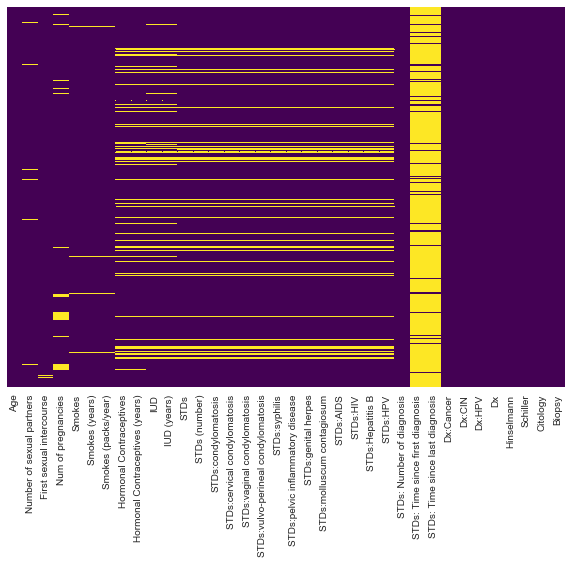

In [425]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**As seen on the heatmap above, two columns have almost consist of missing values. Most of the other columns have missing values as well. In order to find out the percentage of missing values in each column, we will use the function below.**

In [426]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [393]:
missing_values_table(df)

Your selected dataframe has 36 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD,117,13.6
IUD (years),117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:vulvo-perineal condylomatosis,105,12.2
STDs:HPV,105,12.2
STDs:Hepatitis B,105,12.2
STDs:HIV,105,12.2


**26 out of 36 columns have missing values but since 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' columns have % 91.7 missing values, we are going to drop these columns. The rest columns have less than %15  missing values, Since most of our columns have boolean type of variables in order to avoid artificiality instead of using imputing techniques to fill the missing values, we are going to drop them off.**

In [427]:
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis =1 , inplace = True)

**To find our categorical columns**

In [428]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols
list(set(cols) - set(num_cols))

['STDs:molluscum contagiosum',
 'STDs:pelvic inflammatory disease',
 'Smokes (years)',
 'STDs:vulvo-perineal condylomatosis',
 'Hormonal Contraceptives (years)',
 'STDs:AIDS',
 'STDs:Hepatitis B',
 'STDs:syphilis',
 'Num of pregnancies',
 'IUD',
 'STDs:condylomatosis',
 'STDs:HPV',
 'Smokes (packs/year)',
 'Smokes',
 'First sexual intercourse',
 'Number of sexual partners',
 'Hormonal Contraceptives',
 'STDs:HIV',
 'STDs (number)',
 'IUD (years)',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:genital herpes',
 'STDs']

**Since all the data points are numeric, it will be wise to convert them to float type of variables.

In [429]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null float64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vagin

**To tackle with the other missing values, dropping them might be the proper way since most of them are Boolean type of variables which means that any kind of imputation (mean, median or most frequent etc.) can lead us to the wrong conclusions. 

In [430]:
df = df.dropna()
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
# The new shape of the data set: 34 features and 668 data points.
df.shape

(668, 34)

**Since Smokes(packs/year) can not consist of decimal values, this column looks like incorrect and needs to be dropped off. Smokes(years) column has decimal values as well, however we can count on these decimal values as months over 12 if the patients gave exact date for start date of smoking.** 

In [432]:
df.drop(['Smokes (packs/year)'], axis = 1, inplace = True)

In [433]:
# 'Dx:Cancer' column will be our 'y' variable which we are going to create a model to figure out this variable.
# Since it has only 17 True boolean variables, our data set is imbalanced. 
df['Dx:Cancer'].value_counts()

0.0    651
1.0     17
Name: Dx:Cancer, dtype: int64

**This is our new cleaned data set, it is time to save it as a csv file.

In [496]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [497]:
df.to_csv('Cervical_Cancer_Risk_Cleaned.csv')